In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_recipes = pd.read_csv('./RAW_recipes.csv')
raw_interactions = pd.read_csv('./RAW_interactions.csv')

In [3]:
raw_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [4]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
raw_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [6]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [7]:
raw_recipes['submitted'] = pd.to_datetime( pd.Series(raw_recipes['submitted']))

raw_interactions['date'] = pd.to_datetime( pd.Series(raw_interactions['date']))

Text(0, 0.5, 'count')

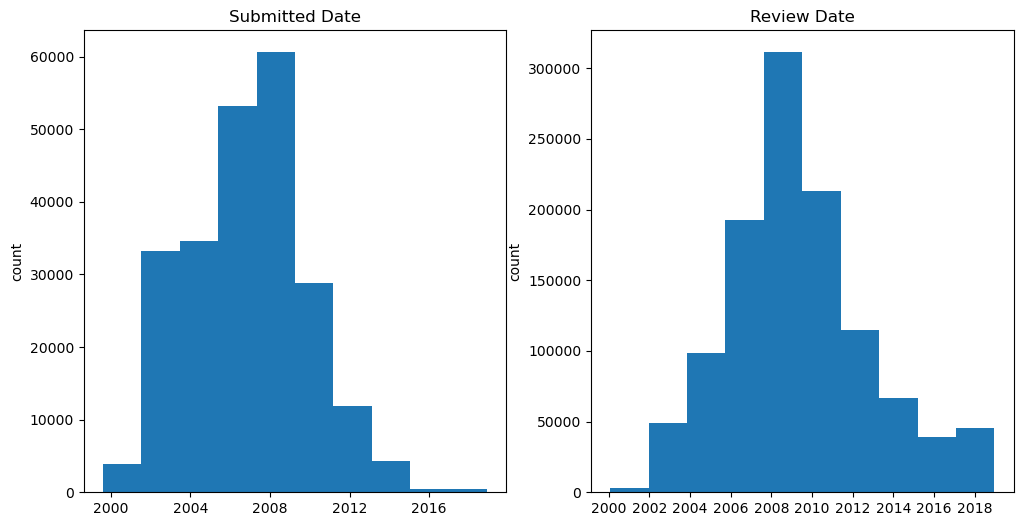

In [8]:
dates, ax = plt.subplots(1,2,figsize = (12,6))

ax[0].hist(raw_recipes['submitted'])
ax[0].set_title('Submitted Date')
ax[0].set_ylabel('count')

ax[1].hist(raw_interactions['date'])
ax[1].set_title('Review Date')
ax[1].set_ylabel('count')

Text(0.5, 0, 'time (minutes)')

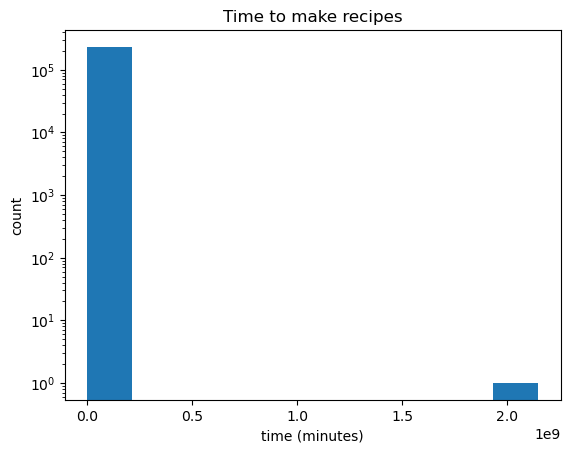

In [9]:
raw_durations, ax = plt.subplots()

ax.hist(raw_recipes['minutes'])
ax.set_title('Time to make recipes')
ax.set_yscale('log')
ax.set_ylabel('count')
ax.set_xlabel('time (minutes)')

In [10]:
median_time = raw_recipes['minutes'].median()

print(median_time)

raw_recipes['minutes'] = raw_recipes['minutes'].mask(raw_recipes['minutes'] > 60*48, median_time)

40.0


Text(0.5, 0, 'time (minutes)')

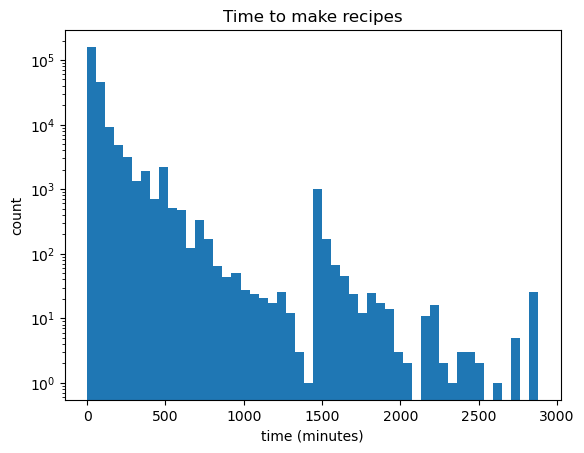

In [11]:
durations, ax = plt.subplots()

ax.hist(raw_recipes['minutes'],bins=50)
ax.set_title('Time to make recipes')
ax.set_yscale('log')
ax.set_ylabel('count')
ax.set_xlabel('time (minutes)')

9.0


Text(0.5, 0, 'No. Steps')

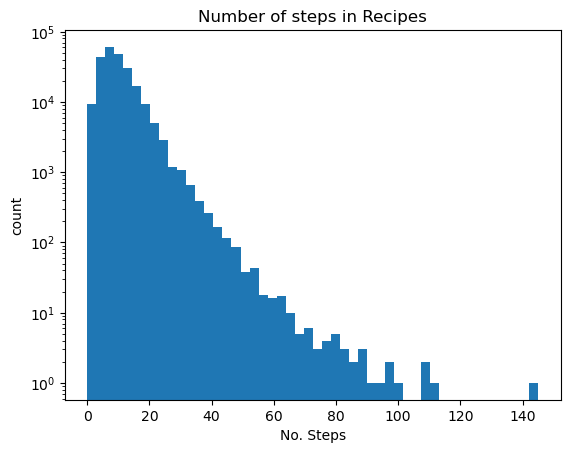

In [12]:
print(raw_recipes['n_steps'].median())

steps, ax = plt.subplots()

ax.hist(raw_recipes['n_steps'],bins=50)
ax.set_title('Number of steps in Recipes')
ax.set_yscale('log')
ax.set_ylabel('count')
ax.set_xlabel('No. Steps')

9.0


Text(0.5, 0, 'No. ingredients')

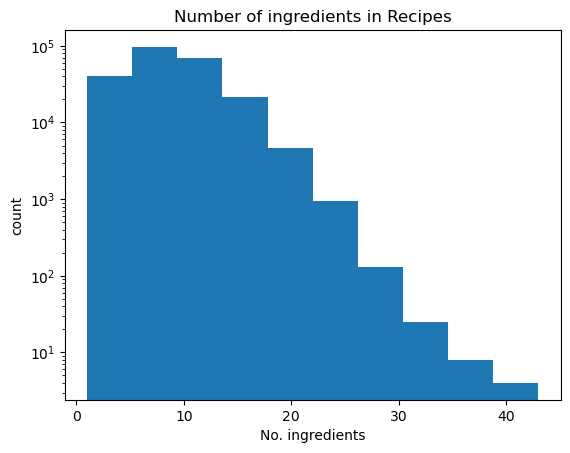

In [13]:
print(raw_recipes['n_ingredients'].median())

steps, ax = plt.subplots()

ax.hist(raw_recipes['n_ingredients'])
ax.set_title('Number of ingredients in Recipes')
ax.set_yscale('log')
ax.set_ylabel('count')
ax.set_xlabel('No. ingredients')

[[1.         0.42770461]
 [0.42770461 1.        ]]


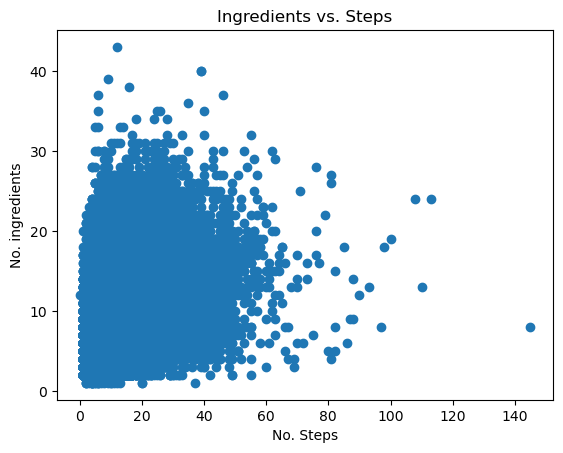

In [43]:
steps_vs_ingredients, ax = plt.subplots()

ax.scatter(raw_recipes['n_steps'],raw_recipes['n_ingredients'])
ax.set_title('Ingredients vs. Steps')
ax.set_xlabel('No. Steps')
ax.set_ylabel('No. ingredients')

print(np.corrcoef(raw_recipes['n_steps'],raw_recipes['n_ingredients']))

4.411016039852804


Text(0.5, 0, 'Stars Rating')

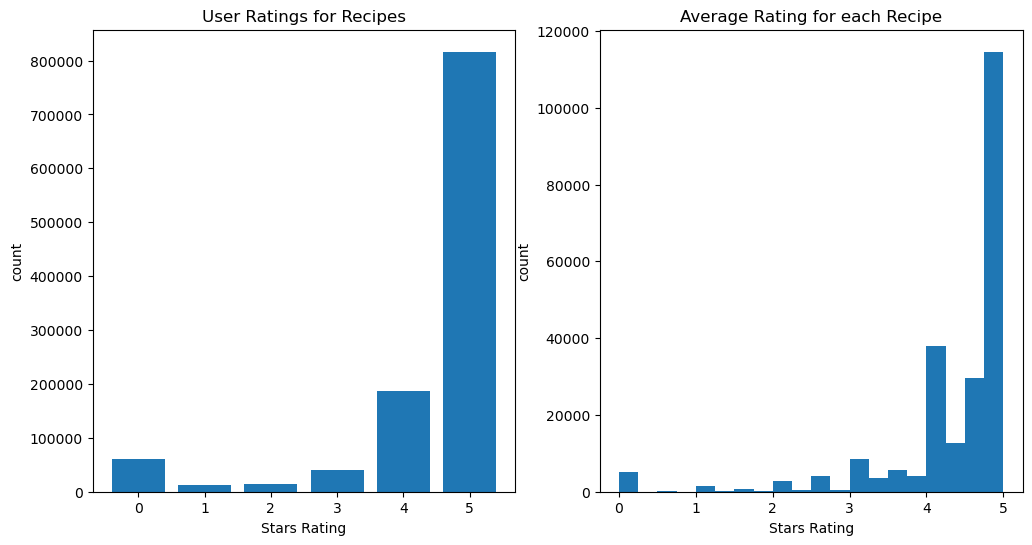

In [15]:
print(raw_interactions['rating'].mean())

ratings, ax = plt.subplots(1,2,figsize = (12,6))

ax[0].bar(range(6),raw_interactions.groupby('rating')['rating'].count())
ax[0].set_title('User Ratings for Recipes')
ax[0].set_ylabel('count')
ax[0].set_xlabel('Stars Rating')

ax[1].hist(raw_interactions.groupby('recipe_id')['rating'].mean(),bins=20)
ax[1].set_title('Average Rating for each Recipe')
ax[1].set_ylabel('count')
ax[1].set_xlabel('Stars Rating')

In [16]:
#Nutrition

# Calories, total fat, sugar, sodium, protein, saturated fat, carbs

In [40]:
nutrition_names = ['Calories', 'Total Fat', 'Sugar', 'Sodium', 'Protein', 'Saturated Fat', 'Carbs']

nutrition = pd.DataFrame(raw_recipes['nutrition'].str.replace('[','').\
    str.replace(']','').str.replace(' ','').str.split(',',expand=True))

nutrition.columns = nutrition_names

recipes_with_nutrition = raw_recipes.join(nutrition)

In [42]:
recipes_with_nutrition.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Calories,Total Fat,Sugar,Sodium,Protein,Saturated Fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
